In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [148]:
#loading dataset
attrition= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [149]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

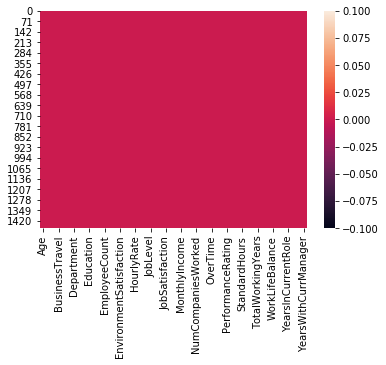

In [150]:
sns.heatmap(attrition.isnull())

In [151]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003393BF48>,
      dtype=object)

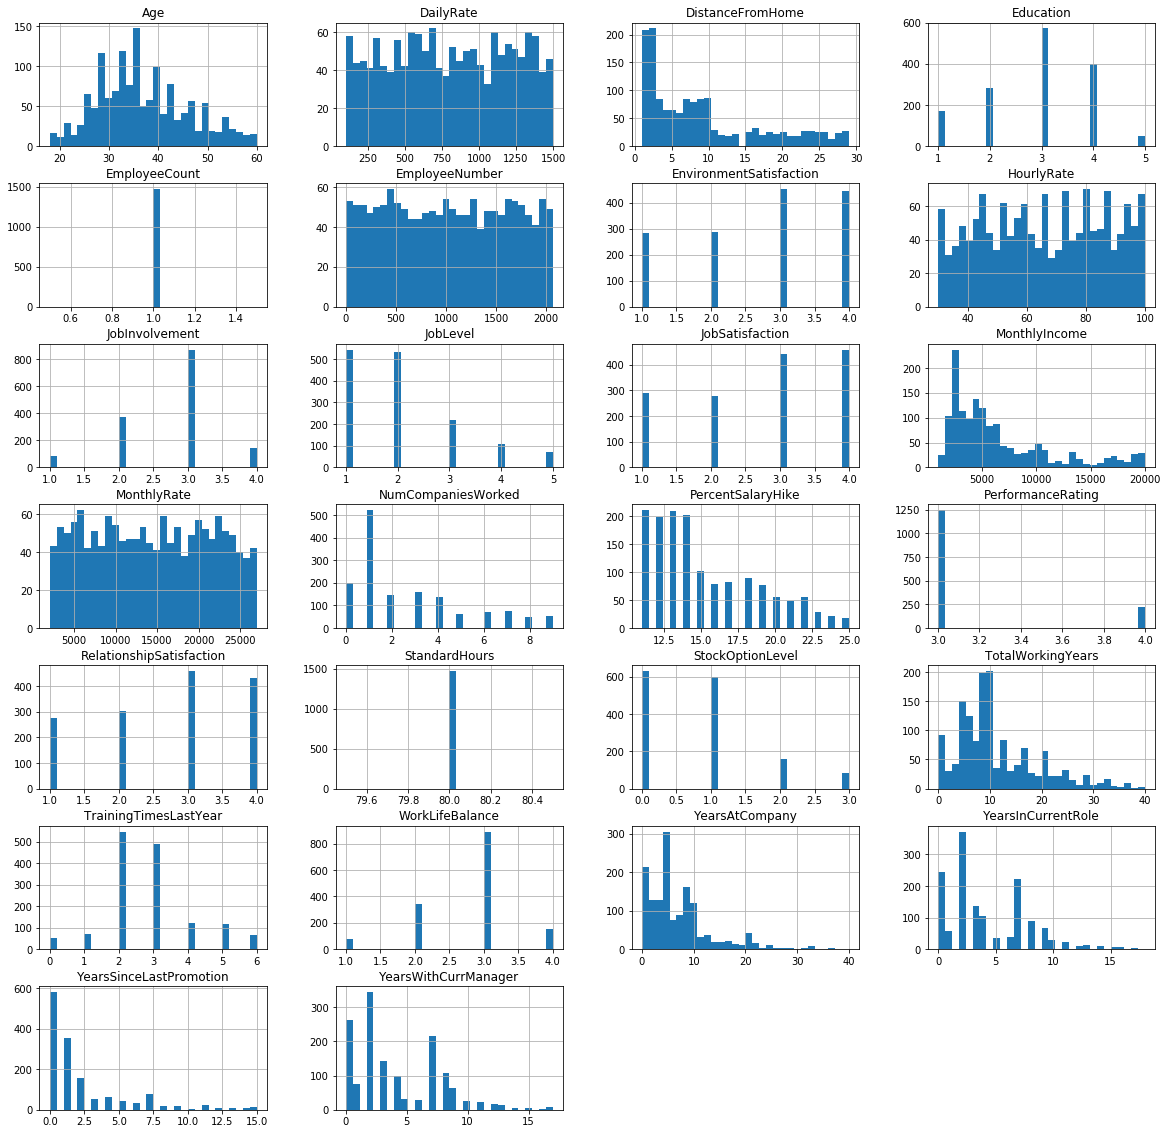

In [152]:
attrition.hist(figsize=(20,20),grid=True,layout=(7,4),bins=30)

Observation:
    we can drop column satndard hours and employee count because it has only one value.

In [153]:
attrition.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [154]:
#reducing skewness
skew=('MonthlyIncome','PerformanceRating','YearsAtCompany','YearsSinceLastPromotion')
for col in skew:
    if attrition.skew().loc[col]>0.55:
        attrition[col]=np.log1p(attrition[col])

In [155]:
attrition.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.718805
YearsWithCurrManager        0.833451
dtype: float64

In [156]:
attrition_x=attrition.drop(['StandardHours','EmployeeCount','Over18'],axis=1)

In [157]:
attrition_x.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance             

In [158]:
#encoded catrgorical varibles
le= LabelEncoder()
attrition_x['Attrition'] = le.fit_transform(attrition_x['Attrition'])
attrition_x['BusinessTravel'] = le.fit_transform(attrition_x['BusinessTravel'])
attrition_x['Department'] = le.fit_transform(attrition_x['Department'])
attrition_x['EducationField'] = le.fit_transform(attrition_x['EducationField'])
attrition_x['Gender'] = le.fit_transform(attrition_x['Gender'])
attrition_x['JobRole'] = le.fit_transform(attrition_x['JobRole'])
attrition_x['MaritalStatus'] = le.fit_transform(attrition_x['MaritalStatus'])
attrition_x['OverTime'] = le.fit_transform(attrition_x['OverTime'])
attrition_x

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1.386294,1,0,8,0,1,1.945910,4,0.000000,5
1,49,0,1,279,1,8,1,1,2,3,...,1.609438,4,1,10,3,3,2.397895,7,0.693147,7
2,37,1,2,1373,1,2,2,4,4,4,...,1.386294,2,0,7,3,3,0.000000,0,0.000000,0
3,33,0,1,1392,1,3,4,1,5,4,...,1.386294,3,0,8,3,3,2.197225,7,1.386294,0
4,27,0,2,591,1,2,1,3,7,1,...,1.386294,4,1,6,3,3,1.098612,2,1.098612,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,1.386294,3,1,17,3,3,1.791759,2,0.000000,3
1466,39,0,2,613,1,6,1,3,2062,4,...,1.386294,1,1,9,5,3,2.079442,7,0.693147,7
1467,27,0,2,155,1,4,3,1,2064,2,...,1.609438,2,1,6,0,3,1.945910,2,0.000000,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,1.386294,4,0,17,3,2,2.302585,6,0.000000,8


In [159]:
z=np.abs(zscore(attrition_x))
threshhold=3
print(np.where(z>3))

(array([  28,   63,   85,   98,  123,  123,  126,  153,  187,  187,  190,
        231,  231,  270,  281,  386,  401,  445,  466,  561,  595,  616,
        624,  635,  686,  716,  746,  875,  894,  926,  956,  976, 1024,
       1043, 1078, 1116, 1184, 1301, 1327, 1348, 1351, 1401, 1430],
      dtype=int64), array([31, 29, 25, 25, 29, 31, 25, 31, 25, 31, 29, 29, 31, 25, 29, 31, 25,
       25, 29, 31, 25, 31, 25, 31, 31, 29, 29, 31, 25, 31, 25, 29, 29, 25,
       31, 25, 25, 25, 29, 31, 29, 25, 29], dtype=int64))


In [160]:
attrition_new=attrition_x[(z<3).all(axis=1)]
print(attrition_x.shape,'\t',attrition_new.shape)
#no outliers, so we will use the attrition_x

(1470, 32) 	 (1430, 32)


[]

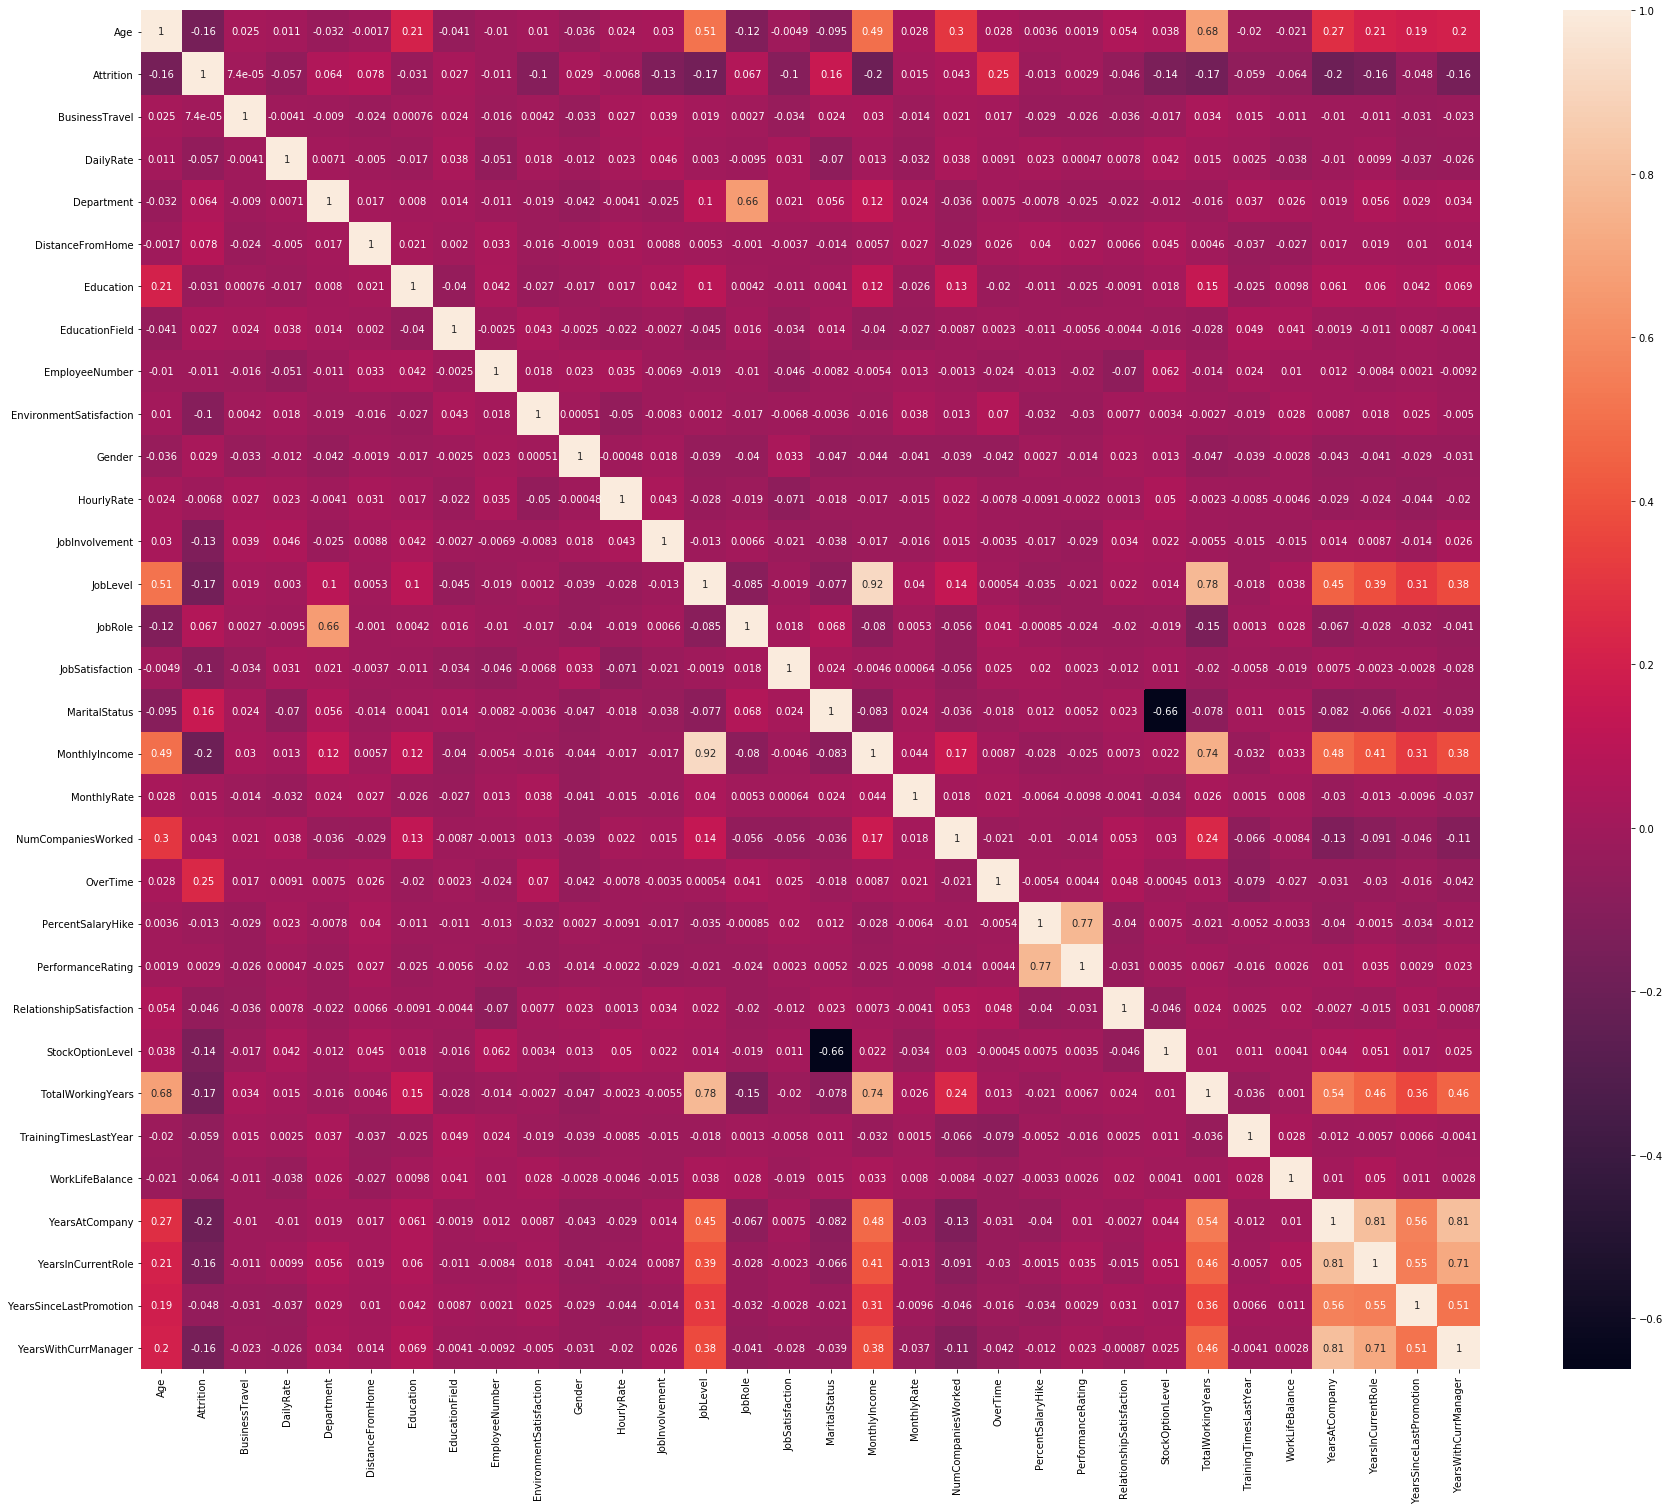

In [161]:
attrition_cor=attrition_x.corr()
plt.figure(figsize=(30,25))
sns.heatmap(attrition_cor,annot=True)
plt.plot()

In [162]:
x=attrition_x.drop('Attrition',axis=1)
y=attrition_x.iloc[:,1].values

In [163]:
model = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC(kernel = 'rbf', random_state = 0),GaussianNB(),RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
max_accuracy_score=0
for r_state in range(80,90):
    x_train , x_test , y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    for i_c in model:
        i_c.fit(x_train,y_train)
        pre_c=i_c.predict(x_test)
        ac_score=accuracy_score(y_test,pre_c)
        print ("accuracy score correspond to random state " ,r_state,'is,ac_score')
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c

print()
print()
print()
print()

print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  83 is,ac_score
accuracy score correspond to random state  83 is,ac_score
accuracy score

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=83,test_size=0.20)
SVC=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
SVC.fit(x_train,y_train)
predictionregion=SVC.predict(x_test)
auc_score=accuracy_score(y_test,predictionregion)
print('Accuracy Score:',auc_score*100)

Accuracy Score: 84.6938775510204


In [165]:
score=cross_val_score(SVC,x,y,scoring='accuracy').mean()
print('Cross Val Score:',score*100)
print('Mean Score:',score.mean()*100)
print('STD Score:',score.std())

Cross Val Score: 83.87755102040816
Mean Score: 83.87755102040816
STD Score: 0.0


In [166]:
predct_problem=SVC.predict_proba(x_test)[:,1]
predct_problem

array([0.16311006, 0.19752175, 0.14430162, 0.20485395, 0.1476214 ,
       0.14616975, 0.20609764, 0.17904192, 0.14317108, 0.15415462,
       0.16280094, 0.14756851, 0.15185885, 0.13867926, 0.14446176,
       0.14414886, 0.1254662 , 0.15030313, 0.17420158, 0.19488893,
       0.1917867 , 0.1220288 , 0.1612794 , 0.13260308, 0.1504754 ,
       0.14720677, 0.19673321, 0.14836089, 0.19025369, 0.14911099,
       0.13725509, 0.18898379, 0.18300083, 0.18783869, 0.13971947,
       0.15145475, 0.14501803, 0.17310462, 0.19588904, 0.14235991,
       0.14494152, 0.15985661, 0.16157944, 0.15980139, 0.12682984,
       0.2015969 , 0.13887559, 0.14566126, 0.15824499, 0.15752434,
       0.15505813, 0.19655118, 0.18335073, 0.15869488, 0.15659271,
       0.19200245, 0.19025751, 0.16920729, 0.16925072, 0.19077499,
       0.19242436, 0.14394028, 0.17928131, 0.16902393, 0.14046267,
       0.18962964, 0.18518393, 0.14533371, 0.19038016, 0.19782215,
       0.18490273, 0.14887217, 0.18876837, 0.177769  , 0.16613

In [167]:
fpr,tpr,thresholds=roc_curve(y_test,predct_problem,pos_label=True)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresholds)

[0.         0.00401606 0.00401606 0.03614458 0.03614458 0.07228916
 0.07228916 0.08433735 0.08433735 0.12048193 0.12048193 0.1686747
 0.1686747  0.18072289 0.18072289 0.18875502 0.18875502 0.21285141
 0.21285141 0.22088353 0.22088353 0.23293173 0.23293173 0.24899598
 0.24899598 0.25301205 0.25301205 0.26907631 0.26907631 0.34136546
 0.34136546 0.36546185 0.36546185 0.36947791 0.36947791 0.39759036
 0.39759036 0.40562249 0.40562249 0.40963855 0.40963855 0.42168675
 0.42168675 0.4497992  0.4497992  0.47791165 0.47791165 0.53815261
 0.53815261 0.57831325 0.57831325 0.58232932 0.58232932 0.58634538
 0.58634538 0.61044177 0.61044177 0.65863454 0.65863454 0.67068273
 0.67068273 0.71084337 0.71084337 0.76706827 0.76706827 0.77108434
 0.77108434 0.8313253  0.8313253  0.85542169 0.85542169 0.93574297
 0.93574297 0.99196787 0.99196787 1.        ]


[0.         0.         0.02222222 0.02222222 0.06666667 0.06666667
 0.11111111 0.11111111 0.13333333 0.13333333 0.15555556 0.15555556
 0.17777778 0.1

<function matplotlib.pyplot.show(*args, **kw)>

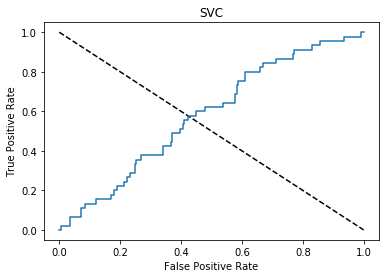

In [168]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC')
plt.show